<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset. 

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model 
5.  Measure the performance of your model
6.  Summarize and interpret your results



**Action:** Import python libraries


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
import sklearn as sk
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm #for running regression!
import statsmodels.formula.api as smf
from sklearn.preprocessing import OrdinalEncoder 

warnings.filterwarnings("ignore")

## <font color='lightblue'>1. Data Understanding </font>

**Action:** Import your data into colaboratory.

In this Dataset , I merged three different dataset, one from Median Income website : https://worldpopulationreview.com/country-rankings/median-income-by-country

and two from Kaggle : One is The Olympic results from 2010 to 2016 and the last is  about 
Happiness .
I merged the three Datasets based on Country keyword.
I dropped some columns and kept the ones that  interested me the most.

I exported the Final DataSet to keep a copy.

In [ ]:
df_Olym = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project_2_20%/Datassss/ProjectA/Olymps2010-2016.csv')
df_happ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project_2_20%/Datassss/ProjectA/happ.csv')
df_Olym = df_Olym.rename(columns= {"Team" :"Country"})
df = pd.merge(left=df_Olym,right=df_happ,on='Country', how="inner")
df_summer = df.drop(['NOC','Games.1','Games','Season'], axis=1)
df_income = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project_2_20%/Datassss/ProjectA/csvData.csv')
df_income = df_income.rename(columns= {"country" :"Country"})
df = pd.merge(left=df_summer,right=df_income,on='Country', how="inner")
df= df.rename(columns= {"Happiness Score" :"Happiness_Score", "Job Satisfaction" : "Job_Satisfaction","Happiness Rank " : "Happiness_Rank" })
df.to_csv("Final_Merge.csv", index=False)
df.head()

,Country,Year,Sport,Medal,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
0,China,2012,Judo,0,79,5.273,71.4,6180.0,1786.0,10410.0,1444216.107
1,China,2016,Swimming,0,79,5.273,71.4,6180.0,1786.0,10410.0,1444216.107
2,China,2016,Swimming,0,79,5.273,71.4,6180.0,1786.0,10410.0,1444216.107
3,China,2012,Swimming,0,79,5.273,71.4,6180.0,1786.0,10410.0,1444216.107
4,China,2012,Triathlon,0,79,5.273,71.4,6180.0,1786.0,10410.0,1444216.107


In [ ]:
df.tail(8)

,Country,Year,Sport,Medal,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
23201,Burkina Faso,2012,Athletics,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23202,Burkina Faso,2012,Judo,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23203,Burkina Faso,2012,Swimming,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23204,Burkina Faso,2012,Swimming,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23205,Burkina Faso,2016,Swimming,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23206,Burkina Faso,2016,Swimming,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23207,Burkina Faso,2016,Judo,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096
23208,Burkina Faso,2016,Athletics,0,134,4.032,56.2,1530.0,168.0,NaN,21497.096


In [ ]:
df.shape

(23209, 11)

**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

In [ ]:
#df.dtypes
df.info()
print("Country , Sport and Medal are originally strings before pre-processing, Happiness Score is a 64 bit integer, the rest of the columns are 64 bit float.")
print("Country and Sport are Nominal/Categorical qualitative, Medal and Year are Ordinal, year can also be classified as numerical contrinuous interval on some diffferent dataset.")
print("Happiness_Score, Job_Satisfaction,medianHouseholdIncome, medianPerCapitaIncome, medianAnnualIncome,pop2021 are 64 bit float Numerical Continuous quantitative attribute.")
print("MedianHouseholdIncome, medianPerCapitaIncome, medianAnnualIncome are ratio-scaled Attributes.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23209 entries, 0 to 23208
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                23209 non-null  object 
 1   Year                   23209 non-null  int64  
 2   Sport                  23209 non-null  object 
 3   Medal                  23209 non-null  object 
 4   Happiness Rank         23209 non-null  int64  
 5   Happiness_Score        23209 non-null  float64
 6   Job_Satisfaction       23209 non-null  float64
 7   medianHouseholdIncome  22779 non-null  float64
 8   medianPerCapitaIncome  22779 non-null  float64
 9   medianAnnualIncome     20351 non-null  float64
 10  pop2021                23209 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.1+ MB
Country , Sport and Medal are originally strings before pre-processing, Happiness Score is a 64 bit integer, the rest of the columns are 64 bit float.
Co

In [ ]:
df.isna().sum() / len(df)

Country                  0.000000
Year                     0.000000
Sport                    0.000000
Medal                    0.000000
Happiness Rank           0.000000
Happiness_Score          0.000000
Job_Satisfaction         0.000000
medianHouseholdIncome    0.018527
medianPerCapitaIncome    0.018527
medianAnnualIncome       0.123142
pop2021                  0.000000
dtype: float64

In [ ]:
#drop rows of columns that contains missing values
df = df[df.medianHouseholdIncome.isna()==False]  #drop rows of medianHouseholdIncome that contains missing values
df = df[df.medianPerCapitaIncome.isna()==False] #drop rows of medianPerCapitaIncome that contains missing values
df = df[df.medianAnnualIncome.isna()==False] #drop rows of medianAnnualIncome that contains missing values
df.isna().sum() #sum the numbers of missing values 


Country                  0
Year                     0
Sport                    0
Medal                    0
Happiness Rank           0
Happiness_Score          0
Job_Satisfaction         0
medianHouseholdIncome    0
medianPerCapitaIncome    0
medianAnnualIncome       0
pop2021                  0
dtype: int64

**The Summary indicates that our dataset is clean**

**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

The describe function  summarize the central tendency, dispersion and shape of a
dataset's distribution

For numeric variables suche as : Year	Happiness Rank,	Happiness_Score	Job_Satisfaction,	medianHouseholdIncome,	medianPerCapitaIncome	medianAnnualIncome,	pop2021.
we can describe their distribution. We can compute their mean value, median and measures of central tendency

In [ ]:
#From the min & max Year we can see that my dataset is of range : 2012-2016
df.describe()

,Year,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
count,19921.000000,19921.000000,19921.000000,19921.000000,19921.000000,19921.000000,19921.000000,1.992100e+04
mean,2014.068972,43.595301,6.221332,82.032092,23823.865519,8291.734401,30465.767783,1.602143e+05
std,1.998861,33.987559,0.893503,8.347836,14894.086003,5616.755082,21385.316368,3.295063e+05
min,2012.000000,1.000000,3.794000,52.000000,1870.000000,378.000000,540.000000,6.348140e+02
25%,2012.000000,14.000000,5.569000,74.600000,11074.000000,2900.000000,10410.000000,1.921236e+04
50%,2016.000000,34.000000,6.403000,85.300000,20085.000000,6874.000000,33720.000000,5.130519e+04
75%,2016.000000,67.000000,6.993000,89.200000,38584.000000,14098.000000,48520.000000,1.260508e+05
max,2016.000000,141.000000,7.537000,95.100000,52493.000000,19308.000000,82500.000000,1.444216e+06


Some of the Numerical keys variables are : 	Happiness_Score, medianHouseholdIncome, population2021

In [ ]:
#The min and max of Happiness_Score 
Happiness_Score_min = df['Happiness_Score'].min()
Happiness_Score_max = df['Happiness_Score'].max()

#The min and max of Year
HappyS_min = df['Year'].min()
HappyS_max = df['Year'].max()

#print out the values
print("min Happiness_Score  = ", Happiness_Score_min)
print("max Happiness_Score  = ", Happiness_Score_max)
print("min Year  = ", HappyS_min)
print("max Year  = ", HappyS_max)


min Happiness_Score  =  3.79399991
max Happiness_Score  =  7.537000179
min Year  =  2012
max Year  =  2016


In [ ]:
# The mean
medianHouseholdIncome_mean = df['medianHouseholdIncome'].mean()


# The median
medianHouseholdIncome_median = df['medianHouseholdIncome'].median()

# The variance
medianHouseholdIncome_std = df['medianHouseholdIncome'].std()

print("The mean  of the medianHouseholdIncome is: ", medianHouseholdIncome_mean)
print("The middle most  medianHouseholdIncome is: ", medianHouseholdIncome_median)
print("The standard deviation of  medianHouseholdIncomes is: ", medianHouseholdIncome_std)

The mean  of the medianHouseholdIncome is:  23823.865518799255
The middle most  medianHouseholdIncome is:  20085.0
The standard deviation of  medianHouseholdIncomes is:  14894.086003223578


In [ ]:
print("In my Dataset smallest population Country is ", df.Country[df.pop2021 == df.pop2021.min()].unique())
print("In my Dataset largest population  Country is " ,df.Country[df.pop2021 == df.pop2021.max()].unique())

In my Dataset smallest population Country is  ['Luxembourg']
In my Dataset largest population  Country is  ['China']


Nominal attribute values Country and Sport do no have meaningful order however we can measure the most commonly occuring value with the mode

In [ ]:
#df.Country.value_counts(), gave me 64 as the length
print( "\n\nFrom the length,the dataset had 64 different countries namely :")
mylist = df.Country.unique().tolist()

print("\n",df.Country.unique())



From the length,the dataset had 64 different countries namely :

 ['China' 'Romania' 'France' 'Morocco' 'Spain' 'Italy' 'Russia' 'Argentina'
 'Pakistan' 'Iran' 'Netherlands' 'Ireland' 'United States' 'Egypt'
 'Belgium' 'Australia' 'Cameroon' 'Canada' 'Germany' 'Mexico' 'Japan'
 'Kenya' 'Nigeria' 'Brazil' 'Chile' 'Belarus' 'Portugal' 'Colombia'
 'Saudi Arabia' 'India' 'Venezuela' 'Poland' 'New Zealand' 'Turkey'
 'Sweden' 'Malaysia' 'South Africa' 'Greece' 'Norway' 'Indonesia'
 'Bangladesh' 'Singapore' 'Ukraine' 'Sudan' 'Finland' 'Bulgaria' 'Serbia'
 'Austria' 'Costa Rica' 'Croatia' 'Philippines' 'Ecuador' 'Israel'
 'Thailand' 'South Korea' 'Denmark' 'Hungary' 'Peru' 'Afghanistan'
 'Bolivia' 'Albania' 'Luxembourg' 'Cambodia' 'Vietnam']


In [ ]:
print(df.Sport.value_counts(), "\n\nWe have", len(df.Sport.value_counts()) ,"different category of Sport\n")

Athletics                3068
Swimming                 2412
Gymnastics               1386
Cycling                  1054
Rowing                    880
Shooting                  828
Hockey                    712
Football                  707
Canoeing                  634
Sailing                   626
Equestrianism             618
Fencing                   601
Handball                  538
Volleyball                488
Basketball                472
Judo                      458
Water Polo                451
Wrestling                 450
Table Tennis              370
Boxing                    344
Weightlifting             326
Tennis                    322
Archery                   315
Diving                    314
Rugby Sevens              249
Badminton                 246
Synchronized Swimming     206
Triathlon                 179
Rhythmic Gymnastics       170
Taekwondo                 161
Modern Pentathlon         112
Golf                      106
Beach Volleyball           64
Trampolini

In [ ]:
Country_mode = df['Country'].mode()
Sport_mode = df['Sport'].mode()
print("the most common Sport in my Dataset is: ", Sport_mode)
print("the most common Country in my Dataset is: ", Country_mode)

the most common Sport in my Dataset is:  0    Athletics
dtype: object
the most common Country in my Dataset is:  0    United States
dtype: object


## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and . *Marks: 2*
* A summary statistics with Boxplot visualization

 
Summarry  statistics of some of the key variables from my whiskers

 A boxplot show the spread and centers of a data set, it shows a five number summary  the minimum , Q1: the first quartile , median,  Q3: the third quartile, maximum

  five number summary of Happiness Rank   the minimum : 1. , Q1: the first quartile : 14 , median : 34 ,  Q3: the third quartile : 67 , maximum :  141 

  In the Happiness Rank : 25% of values are smaller than 14 and 75% of values are smaller than 67 

  five number summary of Happiness_Score  the minimum : 3.794. , Q1: the first quartile : 5.569 , median : 6.403 ,  Q3: the third quartile : 67 , maximum :  141 

  five number summary of Job_Satisfaction  the minimum : 52 , Q1: the first quartile : 11074, median : 20085 ,  Q3: the third quartile : 38584, maximum :  52493 

  five number summary of medianPerCapitaIncome the minimum : 378. , Q1: the first quartile : 2900 , median : 6874 ,  Q3: the third quartile : 14098 , maximum :  19308 

  five number s

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

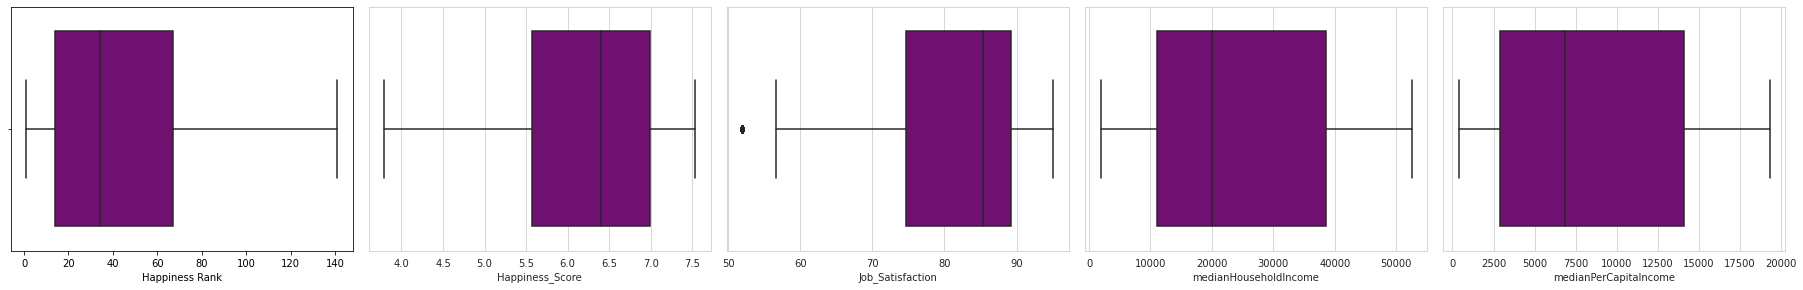

In [ ]:
print(" \nSummarry  statistics of some of the key variables from my whiskers\n")
print(" A boxplot show the spread and centers of a data set, it shows a five number summary  the minimum , Q1: the first quartile , median,  Q3: the third quartile, maximum\n")
print("  five number summary of Happiness Rank   the minimum : 1. , Q1: the first quartile : 14 , median : 34 ,  Q3: the third quartile : 67 , maximum :  141 \n")
print("  In the Happiness Rank : 25% of values are smaller than 14 and 75% of values are smaller than 67 \n")
print("  five number summary of Happiness_Score  the minimum : 3.794. , Q1: the first quartile : 5.569 , median : 6.403 ,  Q3: the third quartile : 67 , maximum :  141 \n")
print("  five number summary of Job_Satisfaction  the minimum : 52 , Q1: the first quartile : 11074, median : 20085 ,  Q3: the third quartile : 38584, maximum :  52493 \n")
print("  five number summary of medianPerCapitaIncome the minimum : 378. , Q1: the first quartile : 2900 , median : 6874 ,  Q3: the third quartile : 14098 , maximum :  19308 \n")
print("  five number summary of  medianHouseholdIncome  the minimum : 1870  , Q1: the first quartile :11074 , median : 20085 ,  Q3: the third quartile : 38584 , maximum :  52493 \n")
l = df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(5*number_of_columns,4*number_of_rows))
for i in range(4,len(l)-2):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='purple',orient='v')
    plt.tight_layout()



The values are much higher than the median in the MedianHousehould INcome and mediancapitaIncome 
The values are much lower than the median in the Job_Satisfaction and Happiness Rank



We have a multimodal distibution since there are  more than a few peaks close together , as the different medianHouseholdIncome and Happiness attributes  accross the countries are different , the distribution is not normal 
 Happiness Rank  incomes is  relatively positively skewed, Mean median are left side and Happiness_score is relatively negatively  skewed, Mean median are on right side
Median Per Capita income is overly  bimodal two local maximums

 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

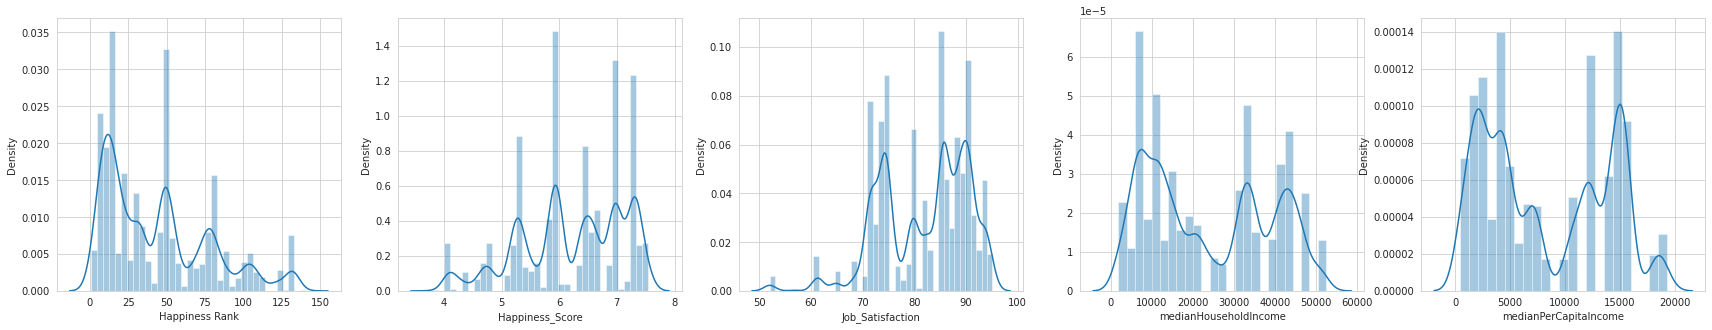

In [ ]:
print("\n\nWe have a multimodal distibution since there are  more than a few peaks close together , as the different medianHouseholdIncome and Happiness attributes  accross the countries are different , the distribution is not normal ")
print(" Happiness Rank  incomes is  relatively positively skewed, Mean median are left side and Happiness_score is relatively negatively  skewed, Mean median are on right side")
print("Median Per Capita income is overly  bimodal two local maximums\n\n ")
number_of_columns=9
plt.figure(figsize=(6*number_of_columns,6*number_of_rows))
for i in range(4,len(l)-2):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 
   

We can see that the population of 2021 is positively skewed, Mean median are  left side
Some Countries have a much larger population than most of the rest of the population




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


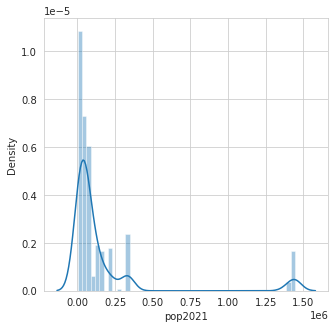

In [ ]:
print("We can see that the population of 2021 is positively skewed, Mean median are  left side")
print("Some Countries have a much larger population than most of the rest of the population\n\n")
plt.figure(figsize=(6*number_of_columns,6*number_of_rows))
for i in range(10,12,2):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 



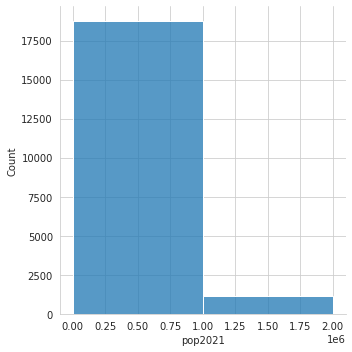

In [ ]:
 #histogram version without kde of pop2021
 sns.displot(df,x='pop2021', binwidth=10**6)

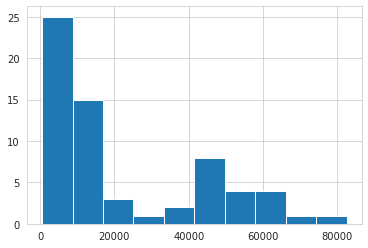

In [ ]:
#distribution of the mean of incomes grouped by country shows the inequality among countries
df_by_Country =df.groupby('Country')
mediane_by_Countr = df_by_Country.medianAnnualIncome.mean().hist()

In [ ]:
# Year an ordinal variable,  data points type are : 2012  : 9617 data points and 2016  : 10304 data points 
df.Year.value_counts()

2016    10304
2012     9617
Name: Year, dtype: int64

In [ ]:
# Medal an ordinal variable,  data points type are : Bronze : 1126 data points and Silver : 1062 data points  and  Gold : 1043 data points , 0 represent rows with no Medal
df.Medal.value_counts()

0         16690
Bronze     1126
Silver     1062
Gold       1043
Name: Medal, dtype: int64

The Visualization of  64 different countries were difficult to read , therefore I chose three country of interest namely :Canada|United States|China  and compared some variables 
The key variables were Total Medal, Total Population and Happy Score

The plot shows the total amount of Medal won from my dataset of Canada|United States|China 
From the plot we can see United States won most of the medal , followed by China then Canada




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


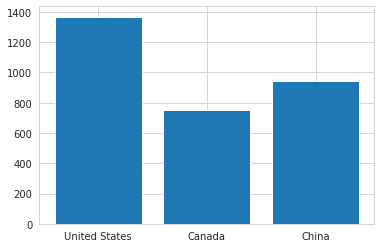

In [ ]:
#I derived from my original DataSet the country and ploted the relationship between the total amount of medal won and the specific countries
df_viz = df.copy()
df_viz1 = df_viz[df_viz["Country"].str.contains("Canada|United States|China")]
df_viz1['Country'] = df_viz1.Country.astype('category')
cat_names = ['Country']
df_cat = pd.get_dummies(df_viz1[cat_names])
df_viz1 = pd.concat([df_viz1,df_cat], axis=1)
Countries = ['United States', 'Canada', 'China']
Tot_Medals = [ df_viz1['Country_United States'].sum() , df_viz1.Country_Canada.sum(),df_viz1.Country_China.sum() ]
plt.bar(Countries, Tot_Medals)
print("The plot shows the total amount of Medal won from my dataset of Canada|United States|China ")
print("From the plot we can see United States won most of the medal , followed by China then Canada\n\n")

The plot shows a key variable , the total amount of population in 2021  
From the plot we can see China is the most populated  , followed by United States then Canada




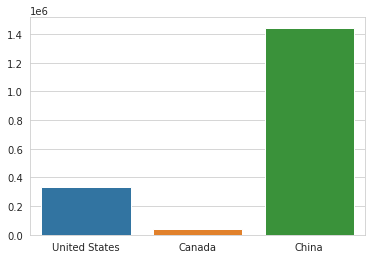

In [ ]:
print("The plot shows a key variable , the total amount of population in 2021  ")
print("From the plot we can see China is the most populated  , followed by United States then Canada\n\n")
Countries = ['United States', 'Canada', 'China']
Tot_pop =[ df_viz1.pop2021[df_viz1.Country == "United States"].unique()[0],df_viz1.pop2021[df_viz1.Country == "Canada"].unique()[0], df_viz1.pop2021[df_viz1.Country == "China"].unique()[0]]
sns.barplot( y=Tot_pop , x=Countries)

The plot shows the Happiness_Score mean  from my dataset of Canada|United States|China 
From the plot we can see Canada is the Happiest Country , followed by United States  then China




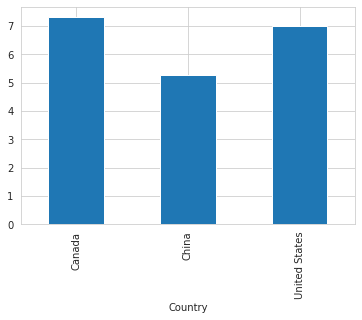

In [ ]:
print("The plot shows the Happiness_Score mean  from my dataset of Canada|United States|China ")
print("From the plot we can see Canada is the Happiest Country , followed by United States  then China\n\n")
%matplotlib inline
df_viz1.groupby('Country').	Happiness_Score.mean().plot(kind = 'bar')

**Action:** 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

Some key variable of my Numerical Dataset are: job satisfaction, Happiness_Score, medianAnnualIncome


 We can see if higher job satisfaction lead to a higher happiness score.
they are positively correlated,the data points are spread and do not form a straight line.



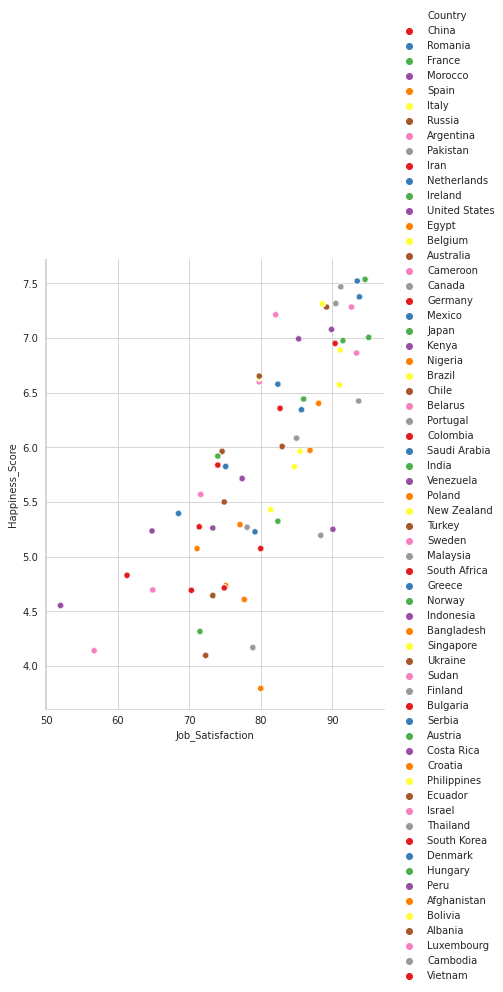

In [ ]:
#My  scaterplot with two variables Job_Satisfaction and Happiness_Score
print("\n We can see if higher job satisfaction lead to a higher happiness score.")
print("they are positively correlated,the data points are spread and do not form a straight line.\n")
plot = sns.relplot(data=df, x='Job_Satisfaction',y='Happiness_Score',hue="Country",sizes="Country",palette="Set1")
plot.fig.set_size_inches(7,7)

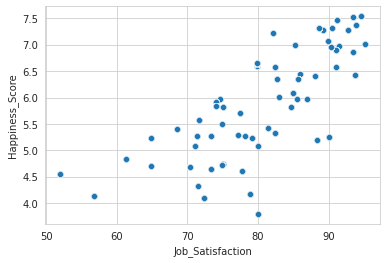

In [ ]:
sns.scatterplot(data=df, x='Job_Satisfaction',y='Happiness_Score')

This plot is showing that after an Annual Income greater than 20000$  if Incomes are high, so too will the Job_Satisfaction Score

Starting from 10000$ AnnualIncome, the Job Satisfaction Score is greater than 70

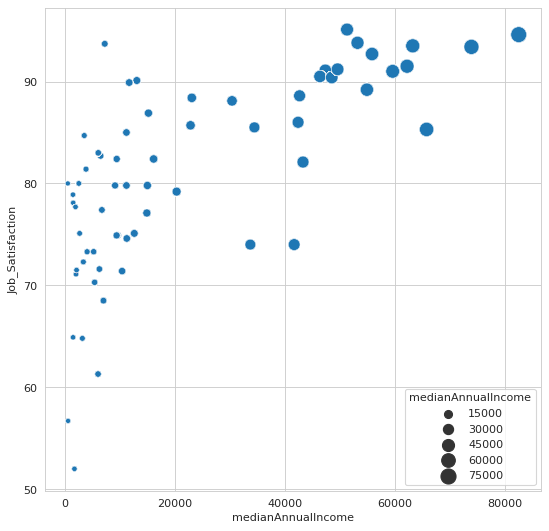

In [ ]:
#Job satisfaction and medianAnnualIncome are positively correlated and non-linear

plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot(data=df, x='medianAnnualIncome',y='Job_Satisfaction',size="medianAnnualIncome",sizes=(20, 200) )


**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1* 

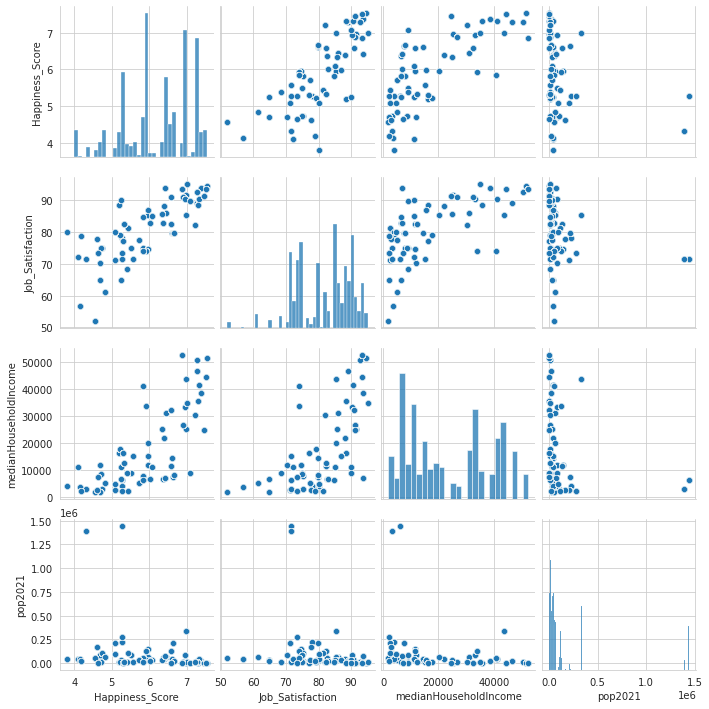

In [ ]:
#let's choose some variables to look at 

df_pairs = df[["Happiness_Score","Job_Satisfaction","medianHouseholdIncome","pop2021"]] 

# the pairplot method shows  all combinations of these variables
# with the variable histogram on the diagonnal
sns.pairplot(df_pairs)

The correlation coefficient, denoted r, ranges between -1 and +1 : 

*  **medianHouseholdIncome and the  medianPerCapitaIncome are strongly = 0.98 positive correlated**

*  **medianHouseholdIncome and the  medianAnnualIncome are strongly = 0.94 positive correlated**

*  **medianPerCapitaIncome and the  medianAnnualIncome are strongly = 0.95 positive correlated**

By consequence , All the Income are related to each other and really close to 1 

*   **The Happiness_Score and Job_Satisfaction	 and  are strongly positive correlated  =0.79 a little weaker than the Incomes**

*   **The Happiness_Score and all different 3 types of income that I merged from a different DataSet 	 and  are strongly positive correlated , they range from 0.75 and 0.78. The pair plot of Happiness_Score and medianHouseholdIncome show a positive strong , Monotonic non-linear correlation from the curve**
*   **From the previous correlation , we can infer that Job_Satisfaction is positively correlated to ll different 3 types of income ranging from 0.64 to 0.71
*  ** Happiness_Score and Happiness Rank are negatively correlated since the Happiness Rank start at 1 

*  **The population of 2021 don't seem to be correlated to any of the features range betwwen 0.27 and 0.34**



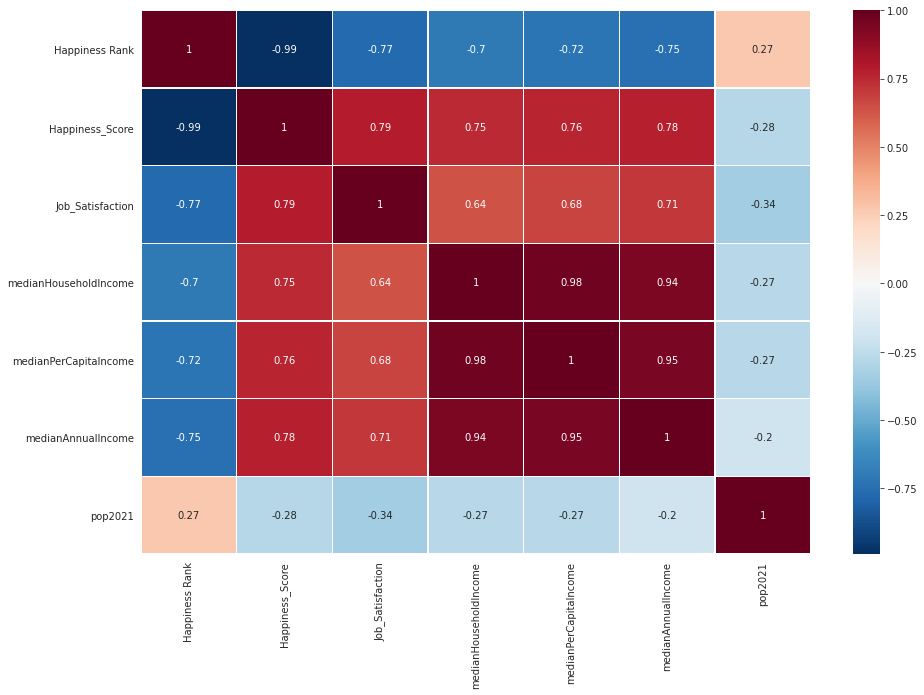

In [ ]:
df_without_year = df.drop(['Year'],axis=1)
pearsoncorr = df_without_year.corr(method='pearson')
corrmat = df_without_year.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
df.describe()

,Year,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
count,19921.000000,19921.000000,19921.000000,19921.000000,19921.000000,19921.000000,19921.000000,1.992100e+04
mean,2014.068972,43.595301,6.221332,82.032092,23823.865519,8291.734401,30465.767783,1.602143e+05
std,1.998861,33.987559,0.893503,8.347836,14894.086003,5616.755082,21385.316368,3.295063e+05
min,2012.000000,1.000000,3.794000,52.000000,1870.000000,378.000000,540.000000,6.348140e+02
25%,2012.000000,14.000000,5.569000,74.600000,11074.000000,2900.000000,10410.000000,1.921236e+04
50%,2016.000000,34.000000,6.403000,85.300000,20085.000000,6874.000000,33720.000000,5.130519e+04
75%,2016.000000,67.000000,6.993000,89.200000,38584.000000,14098.000000,48520.000000,1.260508e+05
max,2016.000000,141.000000,7.537000,95.100000,52493.000000,19308.000000,82500.000000,1.444216e+06


## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Split your data into training and testing datasets *Marks: 1*

In [ ]:
print("My data set is split into 80% training dataset to train the model and 20% dataset to test the Model")

from sklearn.preprocessing import StandardScaler
#Split the dataframe into 80% training and 20% testing datasets
df_train, df_test = train_test_split(df, test_size=0.20)

My data set is split into 80% training dataset to train the model and 20% dataset to test the Model


**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

For my linear regression , I used only numerical attribute so I only needed to Scale my variable .
The reason I scaled is to be able to explain the target variable  and compare the chosen input  variables to each other in term of explaining my target variable Happy_score.
Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.
StandardScaler standardize features by removing the mean and scaling to unit variance
The standard score  is calculated as: z = (x - u) / s

In [ ]:
#numeric variables
numb_names = df_train.drop(['Medal','Sport'],axis=1).select_dtypes('number').columns.tolist()

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_train[numb_names] = sc.fit_transform(df_train[numb_names])

#use the fit from the training data to transform the test data
df_test[numb_names] = sc.transform(df_test[numb_names])

#take a look
df_train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Country,Year,Sport,Medal,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
17715,South Africa,-1.027873,Swimming,0,1.693389,-1.561082,-2.489927,-1.251166,-1.260758,-1.143123,-0.301954
20603,Israel,0.972883,Cycling,0,-0.962138,1.114508,0.008554,0.445152,-0.076687,0.603671,-0.458804
22217,Hungary,0.972883,Canoeing,Gold,0.926237,-1.005538,0.044589,-0.763594,-0.675688,-0.669496,-0.456220
13115,Brazil,0.972883,Athletics,0,-0.637573,0.465812,-0.267721,-1.095680,-1.076808,-0.998221,0.169190
15647,Venezuela,-1.027873,Athletics,0,1.132777,-1.088589,0.969508,-0.840898,-1.062342,-0.812991,-0.397857
...,...,...,...,...,...,...,...,...,...,...,...
2015,France,-1.027873,Swimming,0,-0.372021,0.249206,0.477019,0.495609,0.744484,0.561936,-0.285477
4084,Russia,0.972883,Volleyball,0,0.159085,-0.288381,-0.892341,-0.812230,-0.740696,-0.898338,-0.039163
2082,France,0.972883,Shooting,0,-0.372021,0.249206,0.477019,0.495609,0.744484,0.561936,-0.285477
14466,Portugal,-1.027873,Sailing,0,1.339318,-1.150316,0.765305,-0.511241,-0.492451,-0.344053,-0.454586


Q: estimate the mean and standard deviation for one of the new transformed features.

In [ ]:
#any standard should be equal to one as the formula subtract the mean and divide by the standard deviation
df_train.Happiness_Score.std()

1.0000313769786824

In [ ]:
#any mean should be less than zero as the formula subtract the mean and divide by the standard deviation
df_train.medianHouseholdIncome.mean()

-1.207479007455021e-16

## <font color='lightblue'>4. Build a model  number 1) </font>

**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

In [ ]:
#1. Build the model (define model parameters)
linear_reg_split_model = smf.ols(formula='Happiness_Score ~ medianHouseholdIncome', data=df_train) #note: using training data

#2. fit the model to the training data
linear_reg_split_results = linear_reg_split_model.fit()

#3. predict values in the training and testing dataset
df_train['Happiness_Score_pred'] = linear_reg_split_results.predict(df_train) #note: using train data
df_test['Happiness_Score_pred'] = linear_reg_split_results.predict(df_test) #note: using test data

#Get a summary of the model parameters
print(linear_reg_split_results.summary())
print("\n\n Median Houshold Income has a high slope but how important is it to other variables\n\n")

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.975e+04
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:32:18   Log-Likelihood:                -16188.
No. Observations:               15936   AIC:                         3.238e+04
Df Residuals:                   15934   BIC:                         3.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.693e-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Visualize predictions on the training dataset

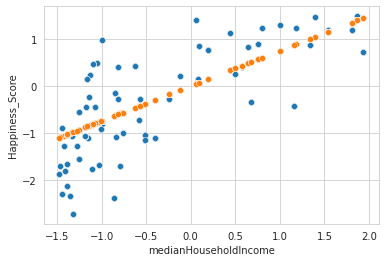

In [ ]:
sns.scatterplot(data=df_train,x="medianHouseholdIncome",y="Happiness_Score") # observed score
sns.scatterplot(data=df_train,x="medianHouseholdIncome",y="Happiness_Score_pred") #predicted score


Visualize predictions on the testing dataset

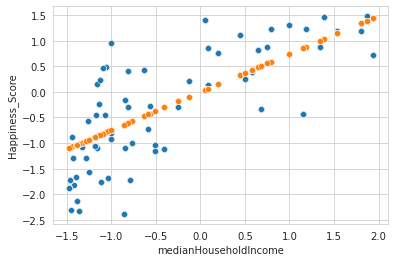

In [ ]:
sns.scatterplot(data=df_test,x="medianHouseholdIncome",y="Happiness_Score") # observed score
sns.scatterplot(data=df_test,x="medianHouseholdIncome",y="Happiness_Score_pred") #predicted score

In [ ]:
df_test['Happiness_Score'] = df_test.Happiness_Score.round(2)
df_train['Happiness_Score_pred'] = df_train.Happiness_Score_pred.round(2)
df_test['Happiness_Score'] = df_test.Happiness_Score.round(2)
df_train['Happiness_Score_pred'] = df_train.Happiness_Score_pred.round(2)
df_test = df_test[df_test.Happiness_Score_pred.isna()==False]
df_train = df_train[df_train.Happiness_Score_pred.isna()==False]
df_test = df_test[df_test.Happiness_Score.isna()==False]
df_test = df_test[df_test.Happiness_Score_pred.isna()==False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## <font color='lightblue'>5. Measure performance number 1) </font>

How good is the model at predicting?

In [ ]:
#mean squared error

mse_train = sk.metrics.mean_squared_error(df_train['Happiness_Score'], df_train['Happiness_Score_pred']) 

print(" Mean squared error = ", mse_train)

 Mean squared error =  0.44650699811013866


> Making predictions in the testing dataset (not used to fit the model)

In [ ]:
#mean squared error
mse_test = sk.metrics.mean_squared_error(df_test['Happiness_Score'], df_test['Happiness_Score_pred']) 

print(" Mean squared error = ", mse_test)

 Mean squared error =  0.43643396883546925


## <font color='lightblue'>4. Build a model number 2 )</font>

**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

statsmodels.formula.api is used to fit statistical models using R-style, df_train is fed as argument the syntax following the formula is target_of_insterest ~ variable1 + variable2 + ..n

In [ ]:
#1. build the model (define model parameters)
all_columns = "+ ".join(df_train.drop(['Sport','Medal','Country', 'Happiness Rank', 'Happiness_Score', 'Happiness_Score_pred'],axis=1).columns )
my_formula = "Happiness_Score~" + all_columns
large_linear_reg_large_scaled = smf.ols(formula=my_formula , data=df_train) #use training data

#2. fit the model to the training data
large_linear_reg_large_scaled_res = large_linear_reg_large_scaled.fit()

#3. predict with the full model
df_train['Happiness_Score_pred'] = large_linear_reg_large_scaled_res.predict(df_train) #predict on training data
df_test['Happiness_Score_pred'] = large_linear_reg_large_scaled_res.predict(df_test) #predict on testing data
print("I made a copy so I can look at the Happiness_Score_pred dataframe with the goal of predicting my target variable")
print("We can see that the Happiness_Score_pred and the Actual_score are close in some Countries  \n\n")
df_copy = df_test.copy()
df_copy['Happiness_Score_pred'] = large_linear_reg_large_scaled_res.predict(df_copy) 
df_copy['Actual_score'] = df_test.Happiness_Score
df_copy.tail(15000)


I made a copy so I can look at the Happiness_Score_pred dataframe with the goal of predicting my target variable
We can see that the Happiness_Score_pred and the Actual_score are close in some Countries  




,Country,Year,Sport,Medal,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021,Happiness_Score_pred,Actual_score
19795,Serbia,0.972883,Tennis,0,0.867225,-0.93,-1.625068,-1.001309,-0.938755,-1.097167,-0.459086,-1.234426,-0.93
7058,United States,-1.027873,Athletics,0,-0.873620,0.87,0.392935,1.336989,1.286514,1.657375,0.533131,0.854282,0.87
8578,Australia,0.972883,Athletics,0,-0.991643,1.19,0.861400,1.537334,1.205432,1.148577,-0.406783,1.014938,1.19
7028,United States,-1.027873,Diving,Bronze,-0.873620,0.87,0.392935,1.336989,1.286514,1.657375,0.533131,0.854282,0.87
10000,Canada,-1.027873,Shooting,0,-1.080161,1.23,1.017556,1.181503,1.233114,0.748104,-0.369203,0.907886,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19095,Ukraine,-1.027873,Swimming,0,2.608070,-2.38,-1.168615,-0.856076,-0.785880,-1.268330,-0.352680,-1.056279,-2.38
2126,France,0.972883,Athletics,0,-0.372021,0.25,0.477019,0.495609,0.744484,0.561936,-0.285477,0.497677,0.25
17085,Sweden,-1.027873,Handball,0,-1.021149,1.19,1.281818,1.804392,1.849439,1.192188,-0.454610,1.274245,1.19
327,China,-1.027873,Hockey,0,1.044260,-1.06,-1.276722,-1.186206,-1.159139,-0.938197,3.934094,-1.122543,-1.06


In [ ]:
#Get a summary of the model parameters
print(large_linear_reg_large_scaled_res.summary()) 

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     7010.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:32:19   Log-Likelihood:                -12317.
No. Observations:               15936   AIC:                         2.465e+04
Df Residuals:                   15929   BIC:                         2.470e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.808e-

How well does it do on the test data?

I chose two predictors namely  Job_Satisfaction and medianAnnualIncome :  from the other because of the highest coeff with the highest magnitude and positif sign we'll have to look at one at a time.

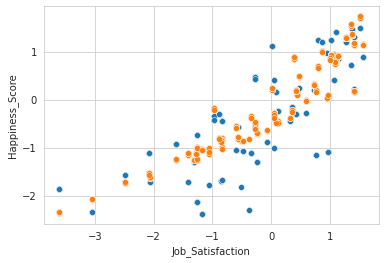

In [ ]:
sns.scatterplot(data=df_test,x='Job_Satisfaction', y='Happiness_Score')
sns.scatterplot(data=df_test,x='Job_Satisfaction', y='Happiness_Score_pred')

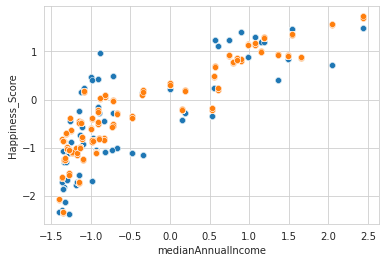

In [ ]:
sns.scatterplot(data=df_test,x='medianAnnualIncome', y='Happiness_Score')
sns.scatterplot(data=df_test,x='medianAnnualIncome', y='Happiness_Score_pred')

In [ ]:
df_test['Happiness_Score'] = df_test.Happiness_Score.round(2)
df_train['Happiness_Score_pred'] = df_train.Happiness_Score_pred.round(2)
df_test['Happiness_Score'] = df_test.Happiness_Score.round(2)
df_train['Happiness_Score_pred'] = df_train.Happiness_Score_pred.round(2)
df_test = df_test[df_test.Happiness_Score_pred.isna()==False]
df_train = df_train[df_train.Happiness_Score_pred.isna()==False]
df_test = df_test[df_test.Happiness_Score.isna()==False]
df_test = df_test[df_test.Happiness_Score_pred.isna()==False]

## <font color='lightblue'>5. Measure performance number 2)</font>

In [ ]:
#mean squared error on the training dataset with multiple linear regression
mse_multi = sk.metrics.mean_squared_error(df_train['Happiness_Score'], df_train['Happiness_Score_pred']) 

print(" Mean squared error = ", mse_multi.round(3))

 Mean squared error =  0.275


**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

In [ ]:
#I us
#mean squared error of all the numeric attributes  much smaller with multiple variable
mse_full = sk.metrics.mean_squared_error(df_test['Happiness_Score'], df_test['Happiness_Score_pred'])
print("The confusion matrix would not be a good performace measure in our case therefore ") 
print(" I used the MSE to Measure the performance of my model with  the linear regression method ")
print("\n\nMSE is the sum of squared distances between our target variable and predicted values.The range is 0 to ∞")
print("The closer our  target data points variable are to the  predicted values.The smaller our Sum of Squared will be")
print("0.27 is close to 0 which suggest that our test model does a good work in predicting the Happiness Score\n")
print(" Mean squared error = ", mse_full)


The confusion matrix would not be a good performace measure in our case therefore 
 I used the MSE to Measure the performance of my model with  the linear regression method 


MSE is the sum of squared distances between our target variable and predicted values.The range is 0 to ∞
The closer our  target data points variable are to the  predicted values.The smaller our Sum of Squared will be
0.27 is close to 0 which suggest that our test model does a good work in predicting the Happiness Score

 Mean squared error =  0.264841333169101


## DataFrame for a Decision Tree that evaluate some countries based on different attribute

In [ ]:
print("The following code randomly choose  k the number of country from the 64 differents countries ")
import random

# sampling with replacement
original_list = mylist
# k = number of items to select
sample_list = random.choices(original_list, k=10)


The following code randomly choose  k the number of country from the 64 differents countries 


In [ ]:
# .join() with lists
numList = sample_list
separator = '|'
mylist = separator.join(numList)
df_Country = df[df["Country"].str.contains(mylist)]
df_Country.shape
df_Country.head()


,Country,Year,Sport,Medal,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
4783,Argentina,2012,Rowing,0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826
4784,Argentina,2016,Volleyball,0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826
4785,Argentina,2016,Basketball,0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826
4786,Argentina,2016,Hockey,0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826
4787,Argentina,2016,Equestrianism,0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826


### Data Wrangling

Let's convert Year to 0/1 , our dataset has only 2012 and 2016, this representation of year data is  more expressive

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of features you'd like to turn into 0/1
bin_names = ['Year']

#create a dataframe of those features
bin_features = df_Country[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df_Country[bin_names] = bin_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


#### Preprocessing (categorical input variables)\
> I Converted the categorical ''Sport','Medal' variables using onehot encoding to model my decision tree.
> The reason I converted data is by one-hot encoding those categorical variable , it is much easier to work with then object which allows the representation of categorical data to be more expressive

In [ ]:
#categorical variables
cat_names = ['Sport','Medal']


#create dummy variables
df_cat = pd.get_dummies(df_Country[cat_names])

#add them back to the original dataframe
df_Country = pd.concat([df_Country,df_cat], axis=1)

#remove the old columns
df_Country = df_Country.drop(cat_names, axis=1)

#take a look
df_Country = df_Country.drop(['Medal_0'],axis=1)
df_Country

,Country,Year,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021,Sport_Archery,Sport_Athletics,Sport_Badminton,Sport_Basketball,Sport_Beach Volleyball,Sport_Boxing,Sport_Canoeing,Sport_Cycling,Sport_Diving,Sport_Equestrianism,Sport_Fencing,Sport_Football,Sport_Golf,Sport_Gymnastics,Sport_Handball,Sport_Hockey,Sport_Judo,Sport_Modern Pentathlon,Sport_Rhythmic Gymnastics,Sport_Rowing,Sport_Rugby Sevens,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Synchronized Swimming,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Silver
4783,Argentina,0.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4784,Argentina,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4785,Argentina,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4786,Argentina,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4787,Argentina,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20803,Thailand,1.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20804,Thailand,1.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
20805,Thailand,0.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20806,Thailand,0.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_Country1 = df_Country.copy
df_Country['Position'] = df_Country.Country

df_Country.Position.unique()

array(['Argentina', 'Pakistan', 'Netherlands', 'Germany', 'Brazil',
       'Sweden', 'Singapore', 'Bulgaria', 'Israel', 'Thailand'],
      dtype=object)

#### Preprocessing (categorical target variable)
> As the target variable is Country which is categorical we will convert each category into a number, and unlike the onehot encoding we will keep these numbers within the same column.
> The reason is the country integer values will  have a natural ordered relationship between each other and machine learning algorithms may be able to understand and utilize this relationship

In [ ]:
from sklearn.preprocessing import OrdinalEncoder 

#numeric variables
target_names = ['Country']

#create the standard scaler object
ordinal_encoder = OrdinalEncoder()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_Country[target_names] = ordinal_encoder.fit_transform(df_Country[target_names]).astype(int)

#take a look
df_Country.head(150)


,Country,Year,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021,Sport_Archery,Sport_Athletics,Sport_Badminton,Sport_Basketball,Sport_Beach Volleyball,Sport_Boxing,Sport_Canoeing,Sport_Cycling,Sport_Diving,Sport_Equestrianism,Sport_Fencing,Sport_Football,Sport_Golf,Sport_Gymnastics,Sport_Handball,Sport_Hockey,Sport_Judo,Sport_Modern Pentathlon,Sport_Rhythmic Gymnastics,Sport_Rowing,Sport_Rugby Sevens,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Synchronized Swimming,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Silver,Position
4783,0,0.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
4784,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Argentina
4785,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
4786,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
4787,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
4929,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
4930,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina
4931,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina


In [ ]:
df_Country['Letter']=  df_Country.Country
df_Country

,Country,Year,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021,Sport_Archery,Sport_Athletics,Sport_Badminton,Sport_Basketball,Sport_Beach Volleyball,Sport_Boxing,Sport_Canoeing,Sport_Cycling,Sport_Diving,Sport_Equestrianism,Sport_Fencing,Sport_Football,Sport_Golf,Sport_Gymnastics,Sport_Handball,Sport_Hockey,Sport_Judo,Sport_Modern Pentathlon,Sport_Rhythmic Gymnastics,Sport_Rowing,Sport_Rugby Sevens,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Synchronized Swimming,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Silver,Position,Letter
4783,0,0.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina,0
4784,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Argentina,0
4785,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina,0
4786,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina,0
4787,0,1.0,24,6.599,79.8,14432.0,4109.0,11200.0,45605.826,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Argentina,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20803,9,1.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thailand,9
20804,9,1.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Thailand,9
20805,9,0.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thailand,9
20806,9,0.0,32,6.424,93.7,7029.0,1795.0,7260.0,69950.850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thailand,9


In [ ]:
#this code is only to be able to easily make a dictionnary to feed my dtreeviz 
df_Country1 = df_Country.copy()
df_grab = df_Country[['Position','Letter']]
df_grab.Letter = df_grab.Letter.astype(int)
df_grab
test_dict = pd.Series(df_grab.Position.values,index=df_grab.Letter).to_dict()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_Country = df_Country.drop(['Position','Letter'],axis=1)



Different  data splitting. Instead of spliting the dataframe into training and testing, we'll first split the dataframe into inputs and target variables.  we'd like to use X to predict y. Then we split each into training and testing sets. This makes it easier to work with sklearn algorithms.

In [ ]:

#split data into predictors (X) and target (y)
X = df_Country.drop('Country', axis=1)
y = df_Country['Country']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [ ]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = ['Happiness Rank'	,	'Job_Satisfaction',	'medianHouseholdIncome'	,'medianPerCapitaIncome',	'medianAnnualIncome'	,'pop2021'	]
#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

#use the fit from the training data to transform the test data
X_test[numb_names] = sc.transform(X_test[numb_names])

#take a look
X_train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Year,Happiness Rank,Happiness_Score,Job_Satisfaction,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021,Sport_Archery,Sport_Athletics,Sport_Badminton,Sport_Basketball,Sport_Beach Volleyball,Sport_Boxing,Sport_Canoeing,Sport_Cycling,Sport_Diving,Sport_Equestrianism,Sport_Fencing,Sport_Football,Sport_Golf,Sport_Gymnastics,Sport_Handball,Sport_Hockey,Sport_Judo,Sport_Modern Pentathlon,Sport_Rhythmic Gymnastics,Sport_Rowing,Sport_Rugby Sevens,Sport_Sailing,Sport_Shooting,Sport_Swimming,Sport_Synchronized Swimming,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Medal_Bronze,Medal_Gold,Medal_Silver
10943,1.0,-0.226778,6.951,0.590816,0.513799,0.740565,0.709919,-0.057938,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12902,1.0,0.095990,6.635,-1.098368,-1.227165,-1.193013,-1.191840,1.607266,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12933,1.0,0.095990,6.635,-1.098368,-1.227165,-1.193013,-1.191840,1.607266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5043,0.0,0.203579,6.599,-1.098368,-0.761082,-0.889214,-1.091899,-0.548113,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5471,1.0,-0.764724,7.377,1.132630,0.867982,0.797997,0.935870,-0.912055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,1.0,-0.495751,7.213,-0.731847,0.313539,-0.279332,0.457413,-1.019363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5779,0.0,-0.764724,7.377,1.132630,0.867982,0.797997,0.935870,-0.912055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13271,1.0,0.095990,6.635,-1.098368,-1.227165,-1.193013,-1.191840,1.607266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17040,1.0,-0.603340,7.284,0.957337,1.672667,1.480321,1.063330,-1.001822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#1. build the algorithm
classifier = DecisionTreeClassifier()

#2. fit the algorithm to the data
classifier_res= classifier.fit(X_train, y_train)

### Predictions

The result of the confusion matrix shows my True positive and True negative are really high which can be related to  the too perfect accuracy of 1.0 

In [ ]:
y_pred = classifier.predict(X_test)

Measure classification success

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 87   0   0   0   0   0   0   0   0   0]
 [  0 167   0   0   0   0   0   0   0   0]
 [  0   0  29   0   0   0   0   0   0   0]
 [  0   0   0 195   0   0   0   0   0   0]
 [  0   0   0   0  25   0   0   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0   0   0  16   0   0]
 [  0   0   0   0   0   0   0   0  75   0]
 [  0   0   0   0   0   0   0   0   0  25]]


Text(114.0, 0.5, 'True label')

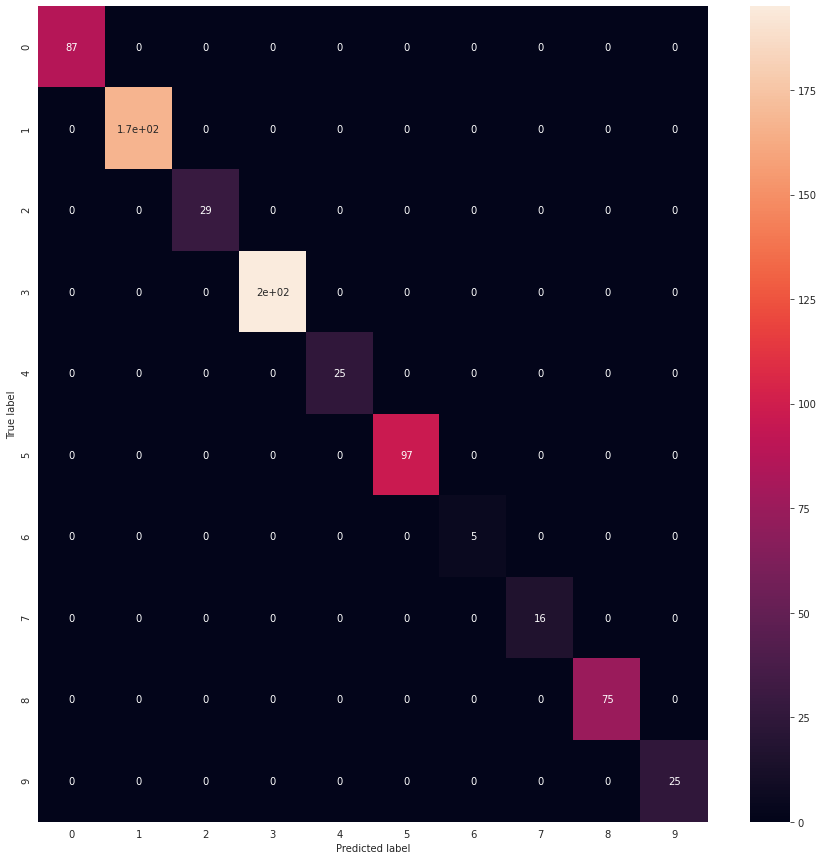

In [ ]:
#more visual approach

plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(y_test, y_pred, average='micro')))
print('Recal: {:.2f}'.format(sk.metrics.recall_score(y_test, y_pred, average='micro')))

Accuracy: 1.00
Precision: 1.00
Recal: 1.00


**Action:** Split your data into training and testing datasets
To keep apart the testing dataset , we divide the training dataset into a validation data set and a training dataset  .

In [ ]:
X_hyper_train, X_hyper_val, y_hyper_train, y_hyper_val = train_test_split(X_train, y_train, test_size=0.20)

In [ ]:

def fit_decision_tree(maxDep):

  #1. build the algorithm
  classifier = DecisionTreeClassifier(max_depth=maxDep)

  #2. Fit the algorithm
  classifier_res= classifier.fit(X_hyper_train, y_hyper_train)

  #3. Make predictions
  y_pred = classifier.predict(X_hyper_val)

  #4. Meausure the accuracy
  accuracy_measured = sk.metrics.accuracy_score(y_hyper_val, y_pred)

  return accuracy_measured

fit_decision_tree(maxDep=25)

1.0

In [ ]:
acc_scores = []
for i in range(1,100):
  acc_s = fit_decision_tree(i)
  acc_scores.append(acc_s)

The plot is a visual of the depth hyper-parameter that can take my decision tree, it gives a good sense of what a good value of the hyper-parameter can be

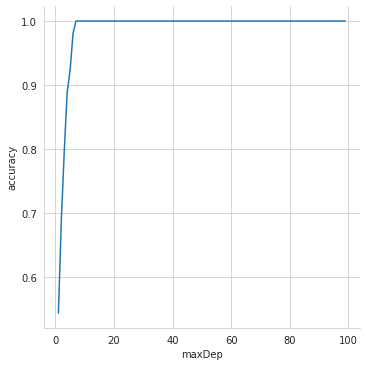

In [ ]:
#create a dataframe
df_plot_maxDep = pd.DataFrame({'accuracy':acc_scores, 'maxDep':range(1,100)})

#make a plot
sns.relplot(data=df_plot_maxDep, x='maxDep',y='accuracy', kind='line')

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz 

My training dataset to build a Decision Tree to classify Some Countries with the goal of predicting which Country Fall into My different variables

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


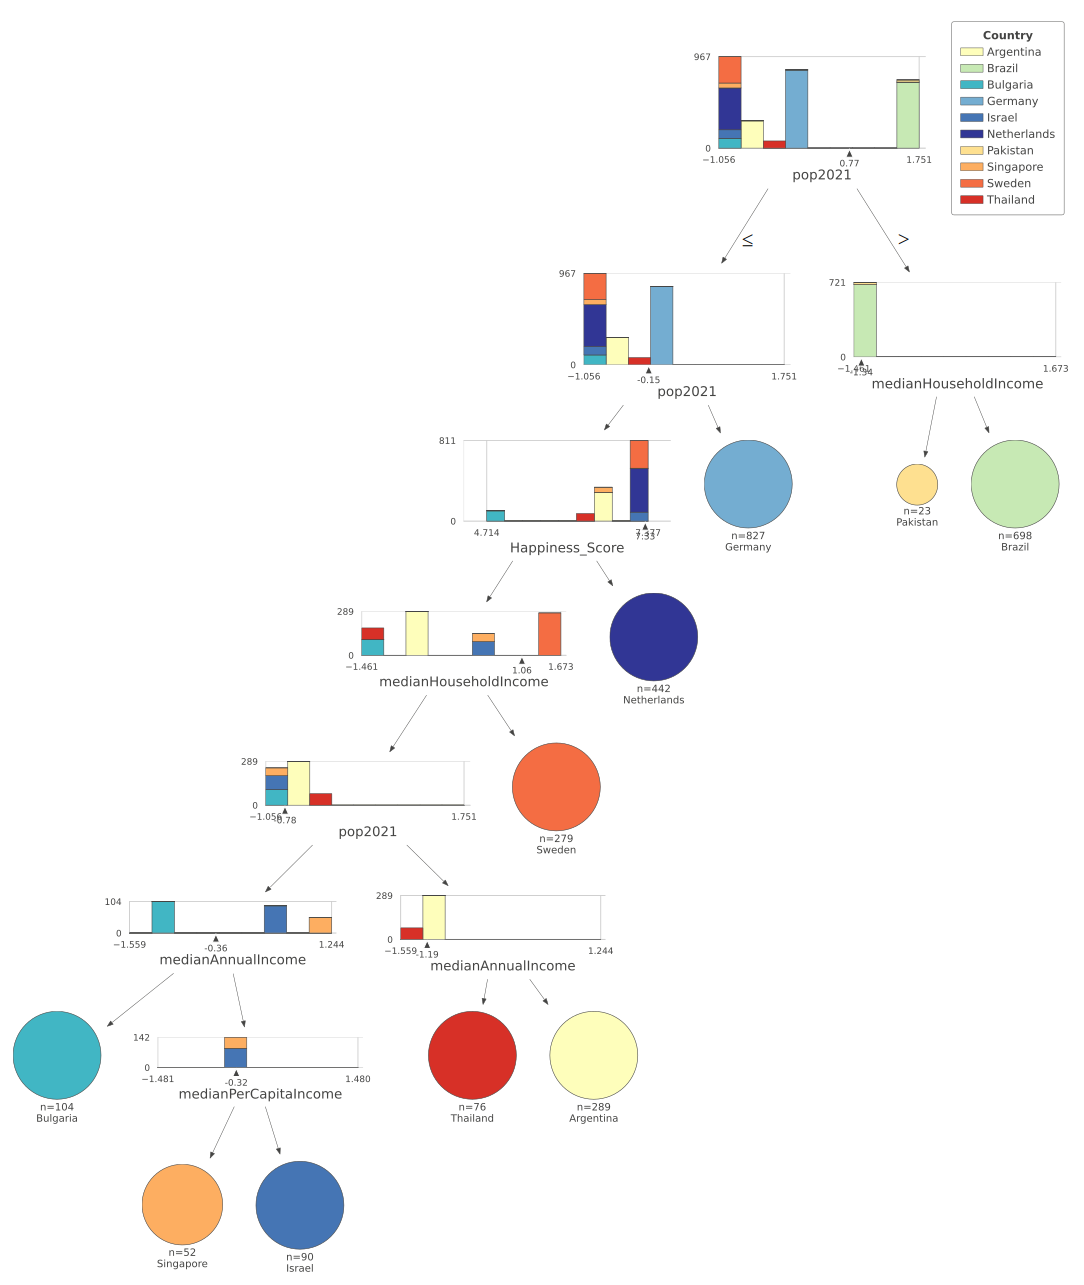

In [ ]:
#build the figure
viz_one_pred = dtreeviz(classifier_res, X_train, y_train,
                target_name="Country",
                feature_names=X_train.columns.to_list(),
                class_names= test_dict,
                scale=1.5,)

#take a look
viz_one_pred

Let's look at how the tree does with the test data, We can see that The target circles are smaller , from a smaller dataset and it predict similar countries 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


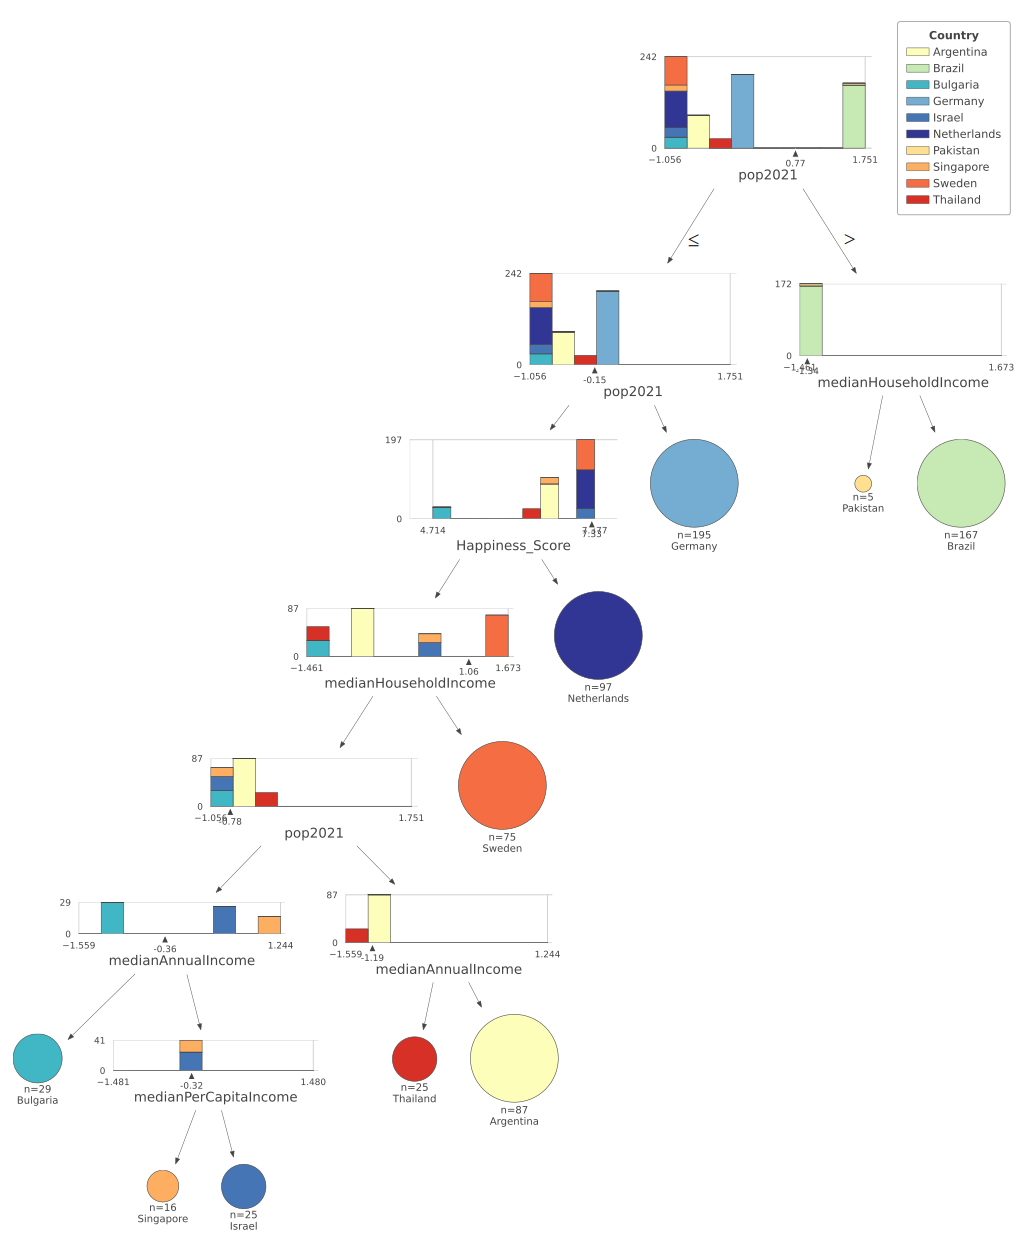

In [ ]:
#build the figure
viz_test = dtreeviz(classifier_res, X_test, y_test,
                target_name="Country",
                feature_names=X_train.columns.to_list(),
                class_names=test_dict,
                scale=1.5)

#take a look
viz_test

In [ ]:
#Vizualize one prediction 
import numpy as np
# pick random X test point
X_values_for_pred = X_test.iloc[12]

X_values_for_pred

Year                           1.000000
Happiness Rank                -0.226778
Happiness_Score                6.951000
Job_Satisfaction               0.590816
medianHouseholdIncome          0.513799
medianPerCapitaIncome          0.740565
medianAnnualIncome             0.709919
pop2021                       -0.057938
Sport_Archery                  0.000000
Sport_Athletics                0.000000
Sport_Badminton                0.000000
Sport_Basketball               0.000000
Sport_Beach Volleyball         0.000000
Sport_Boxing                   0.000000
Sport_Canoeing                 0.000000
Sport_Cycling                  0.000000
Sport_Diving                   0.000000
Sport_Equestrianism            1.000000
Sport_Fencing                  0.000000
Sport_Football                 0.000000
Sport_Golf                     0.000000
Sport_Gymnastics               0.000000
Sport_Handball                 0.000000
Sport_Hockey                   0.000000
Sport_Judo                     0.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


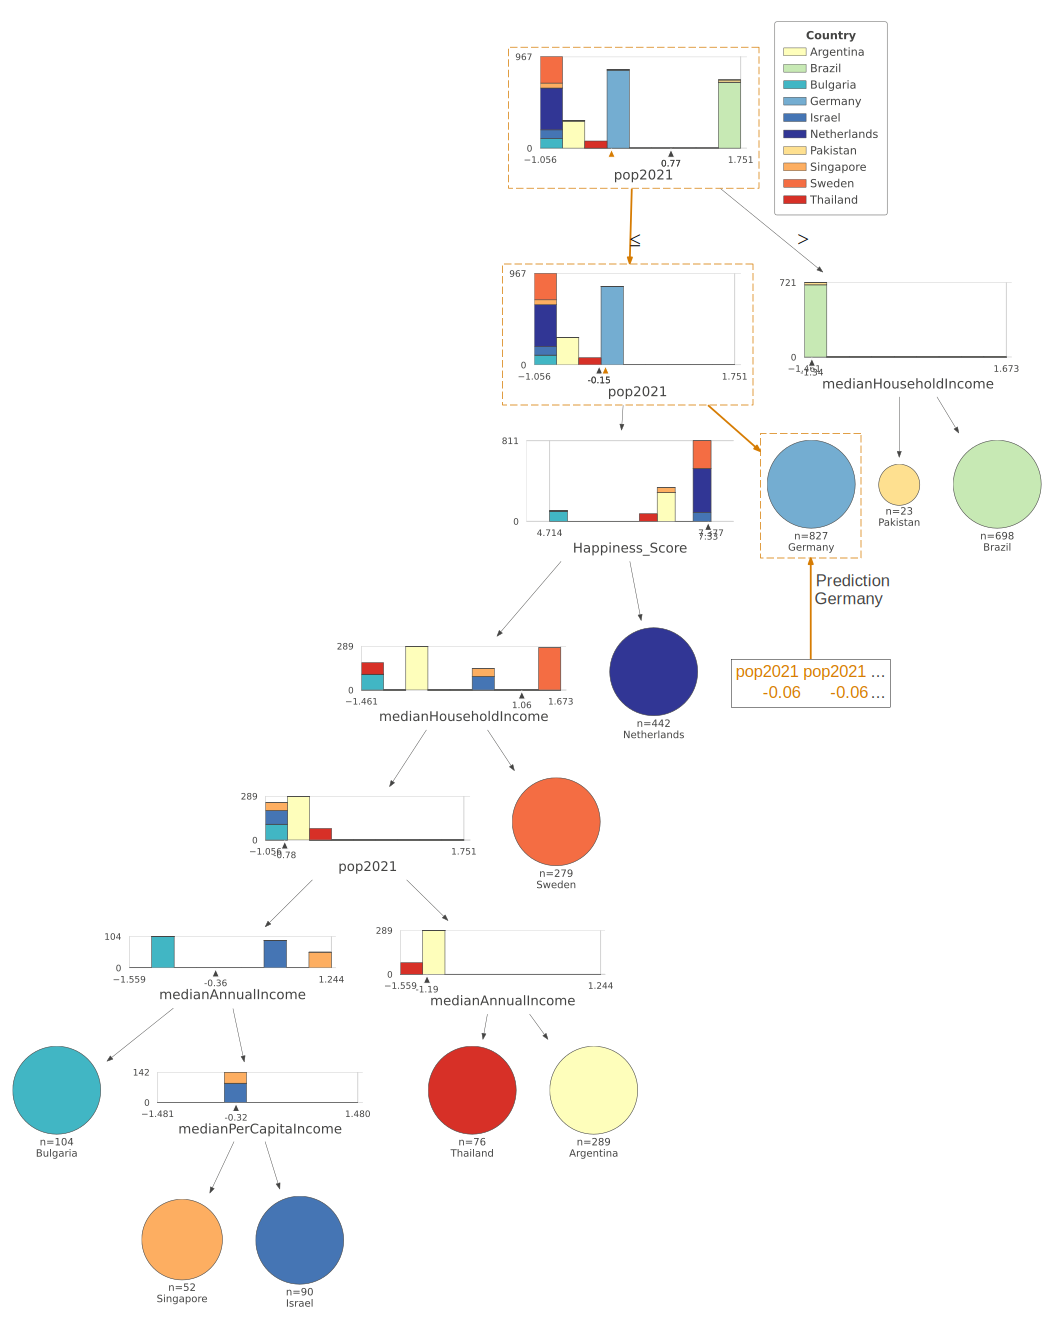

In [ ]:
#build the figure
viz_one_pred = dtreeviz(classifier_res, X_train, y_train,
                target_name="Country",
                feature_names=X_train.columns.to_list(),
                class_names=test_dict,
                scale=1.5,
                X=X_values_for_pred)

#take a look
viz_one_pred

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:** 
> **A)** What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*
 

**Q1:  A)** 

* The performance of my model in the simple linear regression where "medianeHouseholdIncome" on the x axis, and "Happiness_Sore" on the y axis
have an MSE of 0.444 on the training dataset, and 0.441 testing dataset. They are both close to 0 which indicates that it is a good MSE. Both the MSE's are very close which indicates that my  model generalizes well.
The actual values, in comparison to the predicted values, were slightly different which means my model did not overfit .

* In my multiple linear regression the MSE was much smaller (0.27), closer to 0, then my simple linear regression. Again, the training and testing MSE were similar, which suggests a better model. In addition, the cost of my splitting the data into training and testing data set was not high.
Overall, Happy_Score can be closely predictable but not perfectly.


* Modeling and prediction is one of the furthest steps in Data Science, it can only be done after collecting and cleaning data at first,
then exploring and visualizing the data.
A good understanding of the variable of interest is important, the correlations to other variables can help to to build a model.
We can use our models' coefficient magnitude and coefficient to compare the relative effect of each of the features in linear regression, for example.
* Our dataset can be split in different data sets, 
it can be split to Train_DS and Test_Ds. Then the Train_DS can be split into Train_Ds and Validation_DS to help find our hyperparameters in different MLs.
Our aim is to build a good model and avoid under-fitting or over-fitting by choosing the good algorithm.

* Before modeling you data, whether it is categorical or odinal, and if it is your target variable or input variable, your data needs to be pre-processed adequately for you data to fit the model and so you can feed your ML algorithm. 

* Once the best fit model is selected we can use different measures to 
measure performance whether it is MSE for linear regression, or a confusion matrix. 

* The linear regression was much easier to model since the selected features were numerical. It gave a good prediction of my variable of interest and the different influence, however, the decision tree took more time to adapt my data.



> **B)** 
What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*

**Q1:  B)**

From my linear regression Analysis :
* The magnitude of Job_satisfaction is the largest ≈ 0.4750, 
 MedianAnnualIncome is second largest  ≈ 0.2450.
* By consequence Job_Satisfaction play a bigger role in influencing/predicting the Happy_Score then MedianAnnualIncome since the slope is more then two times bigger. The positive range of job_satisfaction is constraint and confident in the sign + and the magnitude.

* MedianHouseholdIncome and medianAnnualIncome is confident to be positive and constraint also.

* The slope of pop2021 is negative comparing to most of my variables. For example, Job_Satisfaction and medianAnnualIncome have a positive confidence interval  with  95% accuracy except the **Pop2021**,
whose range is uncertain. It goes from negative interval to a positive interval, the range is much higher.

* The Job_Satisfaction has a smaller range of ≈ 0.006 (more constraint)
then medianAnnualIncome.

* The std error and uncertainty of the slope of Job_Satisfaction is only of ≈ 0.006 which is much smaller than the MedianAnnualIncome ≈ 0.0228.

* My models and summary suggest that Job_Satistfaction explainS the best, but medianHouseIncome, medianPerCapitaIncome, medianAnnualncome are factors of predictive ability.
It shows also that Year and pop2021 do not have much influence on the Happy_score prediction.


> **C)** How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*

**Q1:  C)**

The relationship between Happy_Score and medianHouseholdIncome in my simple linear regression was of ≈ 0.7 and it generelazied correctly with an MSE of 0.44 with" the testing data simple. 
The relationship between Happy_Score based on Job_Satisfaction, medianHouseholdIncome, medianPerCapitaIncome,medianAnnualncome, and population2021 generelazied with the testing data sample were even better with an MSE of 0.27 which is closer to 0.

With the Median Household Income only as a single input attribute, my MSE was of 0.44 with the training dataset and 0.45 with the testing dataset.
With a large dataset, the cost of splitting my data did not intrude my training dataset MSE.

However, in my multiple linear regression, the MSE score decreased, it did a much lower and better score of 0.27. By adding more features to my model, my testing sample was more reprentative and did a better generalization.
Since the multiple linear regression included the Job_satisfaction, which was the highest slope, and the other 3 types of incomes namely medianHouseholdIncome, medianPerCapitaIncome, medianAnnualncome the relationships generalized much better to the with-held sample.